In [1]:
import pandas, scipy, numpy
import sklearn.ensemble
import sklearn.metrics
from IPython.display import Image

from lad import lad

#### Load data

In [2]:
# German credit score

#1 (bad loans) and 2 (good loans)
path_dataset='/Users/axa/Data/data-german-credit.csv'
X = pandas.read_csv(path_dataset, delimiter=",", index_col=0)
y = X.label
X = X.iloc[:,X.columns != 'label']
X = (X-X.mean())/X.std()

#### Blackbox training

In [3]:
## Train a back-box classifier on the synthetic dataset
train, test, labels_train, labels_test = sklearn.model_selection.train_test_split(X, y, test_size=0.20)

clf = sklearn.ensemble.RandomForestClassifier(n_estimators=200)
clf.fit(train, labels_train)

print(sklearn.metrics.accuracy_score(labels_test, clf.predict(test)))
print(sklearn.metrics.classification_report(labels_test, clf.predict(test)))

0.73
             precision    recall  f1-score   support

          1       0.74      0.89      0.81       126
          2       0.71      0.46      0.56        74

avg / total       0.73      0.73      0.71       200



#### Local Surrogate

In [11]:
ls = lad.LocalSurrogate(X, blackbox=clf, n_support_points=100, max_depth=2)

In [16]:
# Test on a sample

x_toexplain = X.iloc[13].copy()
#x_toexplain.iloc[1] = x_toexplain.iloc[1]+0.01
support_points, surrogate = ls.get_local_surrogate(x_toexplain)

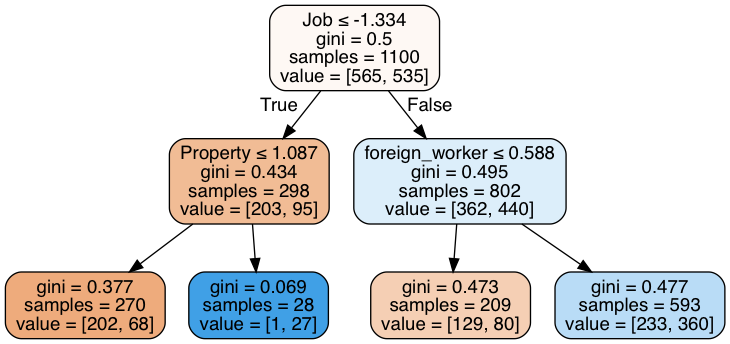

In [15]:
Image(ls.plot_decision_tree(X, surrogate))

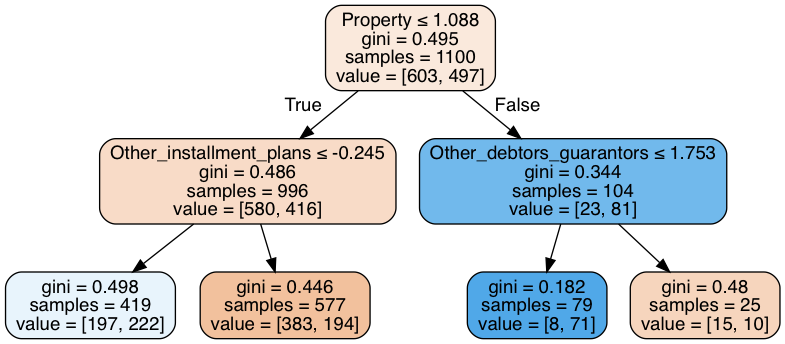

In [17]:
Image(ls.plot_decision_tree(X, surrogate))

#### Assess local surrogate fidelity

#### Give some insights with provided explanation for potential adverse

#### Check explanations (ie. given an adverse generated from a true point, fit the local surrogate to oberse features)